### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

### 1. Load & Preprocess the Data

- Fashion-MNIST contains 28x28 grayscale images in 10 classes.
- Data is normalized to [0,1] and reshaped for CNN input.


In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Optionally, split out a validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)


### 2. Baseline CNN Model

This is a simple CNN with Conv2D, MaxPooling, and Dense layers.


In [8]:
baseline_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

start_time = time.time()
history_baseline = baseline_model.fit(
    x_train, y_train, epochs=10, batch_size=128,
    validation_data=(x_val, y_val), verbose=2
)
baseline_duration = time.time() - start_time

test_loss_baseline, test_acc_baseline = baseline_model.evaluate(x_test, y_test)

Epoch 1/10
422/422 - 15s - 36ms/step - accuracy: 0.7979 - loss: 0.5558 - val_accuracy: 0.8435 - val_loss: 0.4082
Epoch 2/10
422/422 - 14s - 33ms/step - accuracy: 0.8699 - loss: 0.3638 - val_accuracy: 0.8827 - val_loss: 0.3157
Epoch 3/10
422/422 - 14s - 34ms/step - accuracy: 0.8867 - loss: 0.3152 - val_accuracy: 0.8842 - val_loss: 0.3153
Epoch 4/10
422/422 - 14s - 33ms/step - accuracy: 0.8953 - loss: 0.2855 - val_accuracy: 0.9002 - val_loss: 0.2728
Epoch 5/10
422/422 - 14s - 34ms/step - accuracy: 0.9039 - loss: 0.2618 - val_accuracy: 0.9052 - val_loss: 0.2680
Epoch 6/10
422/422 - 14s - 33ms/step - accuracy: 0.9125 - loss: 0.2402 - val_accuracy: 0.9132 - val_loss: 0.2489
Epoch 7/10
422/422 - 14s - 33ms/step - accuracy: 0.9170 - loss: 0.2260 - val_accuracy: 0.9007 - val_loss: 0.2656
Epoch 8/10
422/422 - 14s - 33ms/step - accuracy: 0.9226 - loss: 0.2087 - val_accuracy: 0.9077 - val_loss: 0.2493
Epoch 9/10
422/422 - 14s - 34ms/step - accuracy: 0.9275 - loss: 0.1939 - val_accuracy: 0.9037 - 

### 3. Record Baseline Performance

**Baseline Test Accuracy:** `test_acc_baseline`  
**Training Duration:** `baseline_duration` seconds

Below: Loss and accuracy curves during training.


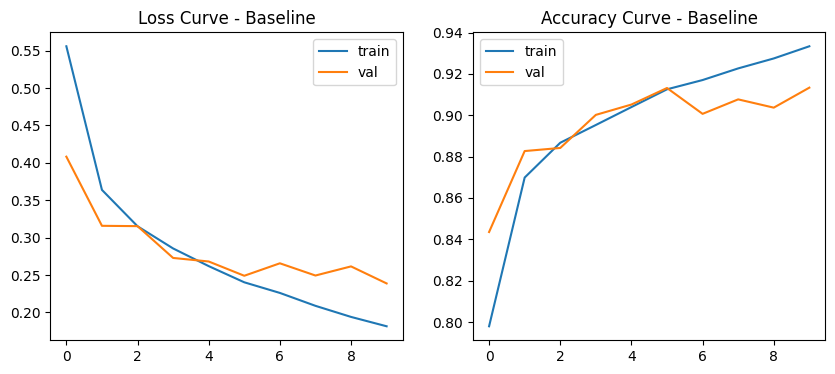

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_baseline.history['loss'], label='train')
plt.plot(history_baseline.history['val_loss'], label='val')
plt.title('Loss Curve - Baseline')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_baseline.history['accuracy'], label='train')
plt.plot(history_baseline.history['val_accuracy'], label='val')
plt.title('Accuracy Curve - Baseline')
plt.legend()
plt.show()


### 4. Hyperparameter Tuning

Two configurations are tested by changing learning rate and filter size:
- **Config A**: Adam (lr=0.001, 32/64 filters)
- **Config B**: Adam (lr=0.0005, 64/128 filters), batch_size=256

Results below compare baseline with tuned configs.


In [10]:
def build_model(filters1=32, filters2=64, lr=0.001):
    model = models.Sequential([
        layers.Conv2D(filters1, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters2, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Config B
model_tuned = build_model(filters1=64, filters2=128, lr=0.0005)
start_time = time.time()
history_tuned = model_tuned.fit(
    x_train, y_train, epochs=10, batch_size=256,
    validation_data=(x_val, y_val), verbose=2
)
tuned_duration = time.time() - start_time
test_loss_tuned, test_acc_tuned = model_tuned.evaluate(x_test, y_test)


Epoch 1/10
211/211 - 28s - 132ms/step - accuracy: 0.7561 - loss: 0.6858 - val_accuracy: 0.8408 - val_loss: 0.4358
Epoch 2/10
211/211 - 26s - 121ms/step - accuracy: 0.8529 - loss: 0.4134 - val_accuracy: 0.8675 - val_loss: 0.3696
Epoch 3/10
211/211 - 27s - 128ms/step - accuracy: 0.8733 - loss: 0.3580 - val_accuracy: 0.8767 - val_loss: 0.3465
Epoch 4/10
211/211 - 26s - 125ms/step - accuracy: 0.8817 - loss: 0.3322 - val_accuracy: 0.8858 - val_loss: 0.3189
Epoch 5/10
211/211 - 27s - 127ms/step - accuracy: 0.8913 - loss: 0.3038 - val_accuracy: 0.8895 - val_loss: 0.3038
Epoch 6/10
211/211 - 26s - 121ms/step - accuracy: 0.8975 - loss: 0.2860 - val_accuracy: 0.8910 - val_loss: 0.2909
Epoch 7/10
211/211 - 26s - 123ms/step - accuracy: 0.9015 - loss: 0.2730 - val_accuracy: 0.8958 - val_loss: 0.2834
Epoch 8/10
211/211 - 27s - 130ms/step - accuracy: 0.9073 - loss: 0.2560 - val_accuracy: 0.9028 - val_loss: 0.2639
Epoch 9/10
211/211 - 25s - 118ms/step - accuracy: 0.9106 - loss: 0.2476 - val_accuracy: 

### 5. Model Compression

To improve generalization and reduce model size for deployment, dropout and weight pruning techniques are applied.

#### Dropout

Dropout randomly deactivates neurons during training to reduce overfitting.

#### Weight Pruning

Weight pruning gradually removes less important weights during training, reducing model size and potentially improving inference speed.

The pruning workflow is as follows:

- Define a pruning schedule using `PolynomialDecay` that slowly increases sparsity from 0% to 50%.
- Wrap a fresh, untrained model with `prune_low_magnitude` before compiling or training.
- Train the model with the `UpdatePruningStep` callback that manages pruning updates.
- Evaluate the pruned model on the test set.
- Before deployment or saving, strip pruning wrappers via `strip_pruning`.

Below is the code implementing pruning on a CNN trained on Fashion-MNIST:

In [5]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot
import numpy as np

# Load and preprocess data (repeat as needed)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define pruning parameters
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.0,
        final_sparsity=0.5,
        begin_step=0,
        end_step=np.ceil(x_train.shape[0]/128).astype(np.int32) * 10
    )
}

# Create model and apply pruning WITH CONSISTENT tf.keras imports
model_pruned = tfmot.sparsity.keras.prune_low_magnitude(
    tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]),
    **pruning_params
)

# Compile the model
model_pruned.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks including pruning update step
callbacks = [tfmot.sparsity.keras.UpdatePruningStep()]

# Train the model with pruning callbacks
model_pruned.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=2
)

# Evaluate on test data
test_loss, test_acc = model_pruned.evaluate(x_test, y_test)
print(f"Pruned model accuracy: {test_acc:.4f}")

# Strip pruning wrappers before saving/deployment
model_for_deployment = tfmot.sparsity.keras.strip_pruning(model_pruned)

Epoch 1/10
422/422 - 17s - loss: 0.5606 - accuracy: 0.7972 - val_loss: 0.3902 - val_accuracy: 0.8595 - 17s/epoch - 40ms/step
Epoch 2/10
422/422 - 14s - loss: 0.3607 - accuracy: 0.8723 - val_loss: 0.3265 - val_accuracy: 0.8800 - 14s/epoch - 32ms/step
Epoch 3/10
422/422 - 14s - loss: 0.3177 - accuracy: 0.8851 - val_loss: 0.2913 - val_accuracy: 0.8923 - 14s/epoch - 32ms/step
Epoch 4/10
422/422 - 14s - loss: 0.2882 - accuracy: 0.8955 - val_loss: 0.2985 - val_accuracy: 0.8893 - 14s/epoch - 32ms/step
Epoch 5/10
422/422 - 14s - loss: 0.2681 - accuracy: 0.9029 - val_loss: 0.2764 - val_accuracy: 0.9005 - 14s/epoch - 34ms/step
Epoch 6/10
422/422 - 14s - loss: 0.2497 - accuracy: 0.9091 - val_loss: 0.2629 - val_accuracy: 0.9033 - 14s/epoch - 34ms/step
Epoch 7/10
422/422 - 14s - loss: 0.2317 - accuracy: 0.9166 - val_loss: 0.2609 - val_accuracy: 0.9025 - 14s/epoch - 32ms/step
Epoch 8/10
422/422 - 14s - loss: 0.2201 - accuracy: 0.9201 - val_loss: 0.2530 - val_accuracy: 0.9087 - 14s/epoch - 32ms/step


### 6. Deployment: Convert Model to TensorFlow Lite

Model is converted to TFLite for efficient deployment.


In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_pruned)
tflite_model = converter.convert()
with open('model_pruned.tflite', 'wb') as f:
    f.write(tflite_model)
import os
orig_size = os.path.getsize('model_pruned.tflite')


INFO:tensorflow:Assets written to: /tmp/tmpx9dsj78j/assets


INFO:tensorflow:Assets written to: /tmp/tmpx9dsj78j/assets
W0000 00:00:1757956728.138120  135656 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1757956728.138163  135656 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-15 22:48:48.138425: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpx9dsj78j
2025-09-15 22:48:48.143753: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-15 22:48:48.143765: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpx9dsj78j
2025-09-15 22:48:48.170620: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-15 22:48:48.273141: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpx9dsj78j
2025-09-15 22:48:48.305690: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 167268

### 7. Evaluation

Below: Confusion matrix for the optimized model.


313/313 [==============================] - 2s 5ms/step


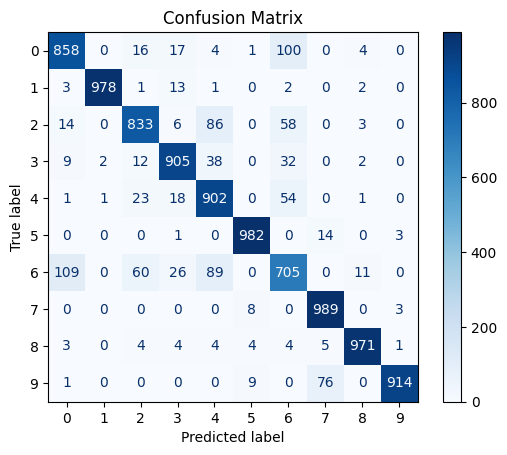

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for the test set
y_pred = np.argmax(model_pruned.predict(x_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using ConfusionMatrixDisplay with blues colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
